# Лабораторная работа №4


# 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

*Набор данных:*

Frequency: частота (в герцах)

Angle of attack: угол атаки (в градусах)

Chord length: длина хорды (в метрах)

Free-stream velocity: скорость набегающего потока (в метрах в секунду)

Suction side displacement thickness: толщина вытеснения на стороне всасывания (в метрах)

Scaled sound pressure level: масштабируемый уровень звукового давления (в децибелах)

In [151]:
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import copy
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split)
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
df = pd.read_csv('airfoil_self_noise.dat.txt', sep='\s+', names=["Frequency","Angle of attack",
                                                                   "Chord length","Free-stream velocity",
                                                                   "Suction side displacement thickness",
                                                                   "Scaled sound pressure level"])
df1=copy.copy(df)
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


# 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после.

In [152]:
print("Количество строк до очистки:" , len(df))
print("Количество строк после очистки:" , len(df.drop_duplicates()))

Количество строк до очистки: 1503
Количество строк после очистки: 1503


# 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

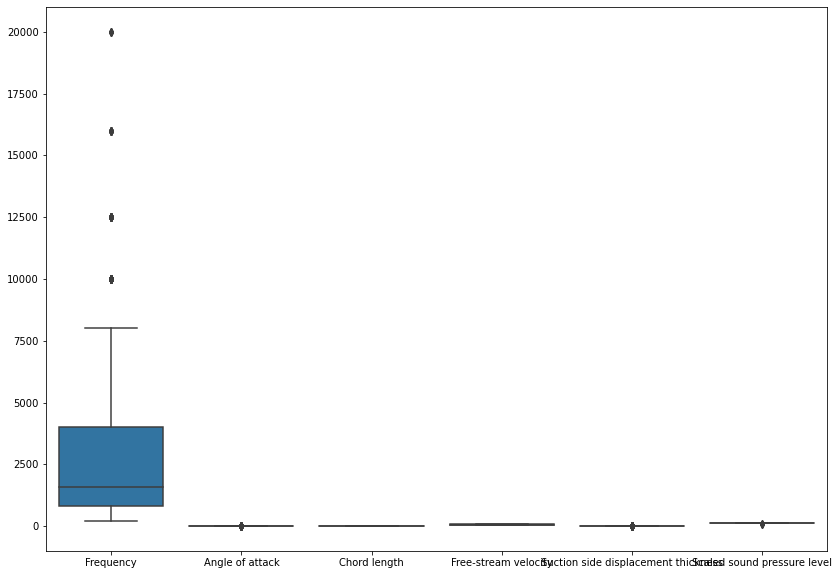

In [153]:
plt.figure(figsize = (14, 10))
sns.boxplot(data = df)
plt.show()

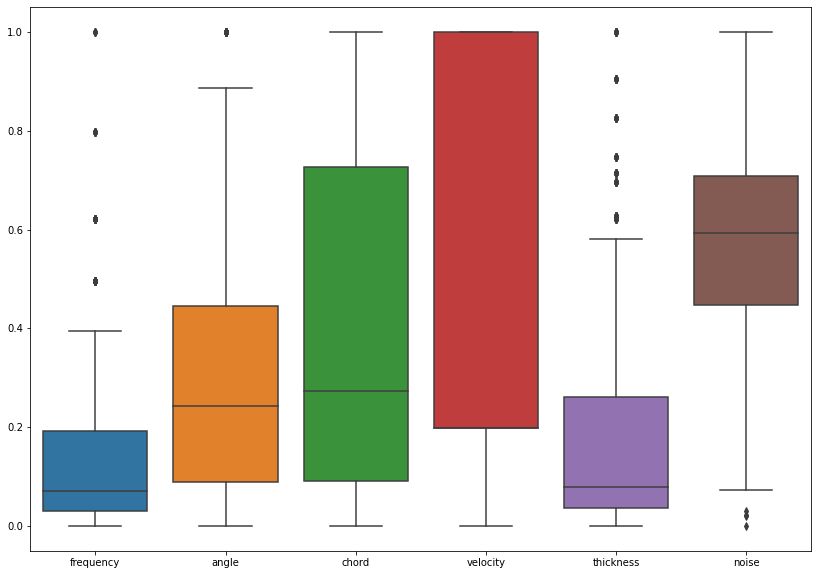

In [154]:
df = df.dropna().reset_index(drop = True)
scaler = MinMaxScaler() # нормализация
column_names = ['frequency', 'angle', 'chord', 'velocity', 'thickness', 'noise']
df = pd.DataFrame(scaler.fit_transform(df), columns = column_names)

plt.figure(figsize = (14, 10))
sns.boxplot(data = df)
plt.show()


# 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены.
Категориальные признаки отсутсвуют.

In [155]:
numerical_columns = [i for i in df.columns[0:6] if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns[0:6] if df[i].dtype.name == 'object']
print("Числовые: ", numerical_columns)
print("Категориальные : ", categorial_columns)

Числовые:  ['frequency', 'angle', 'chord', 'velocity', 'thickness', 'noise']
Категориальные :  []


# 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

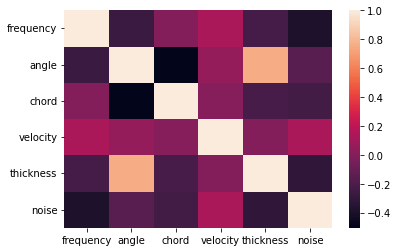

In [156]:
sns.heatmap(df.corr());

Параметр angle коррелирует отрицательно с параметром chord и положительно с параметром thickness, поэтому удалим его.

In [157]:
df = df.drop('angle', axis = 1)
df

,frequency,chord,velocity,thickness,noise
0,0.030303,1.000000,1.000000,0.039005,0.606829
1,0.040404,1.000000,1.000000,0.039005,0.580238
2,0.053030,1.000000,1.000000,0.039005,0.600181
3,0.070707,1.000000,1.000000,0.039005,0.643790
4,0.090909,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...
1498,0.116162,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.272727,0.199495,0.904111,0.075624


# 6. Заполните пропущенные значения в данных;

In [158]:
df = df.fillna(0)
df

,frequency,chord,velocity,thickness,noise
0,0.030303,1.000000,1.000000,0.039005,0.606829
1,0.040404,1.000000,1.000000,0.039005,0.580238
2,0.053030,1.000000,1.000000,0.039005,0.600181
3,0.070707,1.000000,1.000000,0.039005,0.643790
4,0.090909,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...
1498,0.116162,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.272727,0.199495,0.904111,0.075624


# 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [161]:
x, y = df, df1['Scaled sound pressure level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [162]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predict_LR = LR.predict(x_test)

person_PR, pvalue_pearson_PR = pearsonr(predict_LR, y_test)
spermen_PR, pvalue_spermen_PR = spearmanr(predict_LR, y_test)
print('Пирсон: ', person_PR)
print('pvalue: ', pvalue_pearson_PR)
print('Спирмен: ', spermen_PR)
print('pvalue: ', pvalue_spermen_PR)
print('Cредняя абсолютная ошибка = %8.5f' %mean_absolute_error(predict_LR, y_test))

Пирсон:  1.0
pvalue:  0.0
Спирмен:  1.0
pvalue:  0.0
Cредняя абсолютная ошибка =  0.00000


In [163]:
Ridge_for_GS = Ridge()
parameters = {
      "max_iter":[x for x in range(1, 300, 10)],
      "alpha":  np.linspace(0, 1, 20)[1:]}
Ridge_GS = GridSearchCV(Ridge_for_GS, parameters,  n_jobs = -1)
Ridge_GS.fit(x_train, y_train)
best_alpha = Ridge_GS.best_estimator_.alpha

print(Ridge_GS.best_estimator_.alpha)
print(Ridge_GS.best_estimator_.max_iter)

0.05263157894736842
1


In [164]:
ridge = Ridge(alpha=0.05)
ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
print(ridge.coef_)
print('Среднеквадратичная ошибка: {:.3f}, test: {:.3f}'.format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('Коэффициент детерминации: {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[-5.59864437e-02 -1.78807855e-02  9.19293546e-03 -3.66881198e-02
  3.75140467e+01]
Среднеквадратичная ошибка: 0.000, test: 0.000
Коэффициент детерминации: 1.000, test: 1.000


In [165]:
person_PR, pvalue_pearson_PR = pearsonr(y_test_pred, y_test)
spermen_PR, pvalue_spermen_PR = spearmanr(y_test_pred, y_test)
print('Пирсон: ', person_PR)
print('pvalue: ', pvalue_pearson_PR)
print('Спирмен: ', spermen_PR)
print('pvalue: ', pvalue_spermen_PR)

Пирсон:  0.9999993423001798
pvalue:  0.0
Спирмен:  0.9999935574168454
pvalue:  0.0


In [166]:
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.9999895145828662

In [167]:
RigeModel = Ridge(alpha=0.01)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.9999998937491429

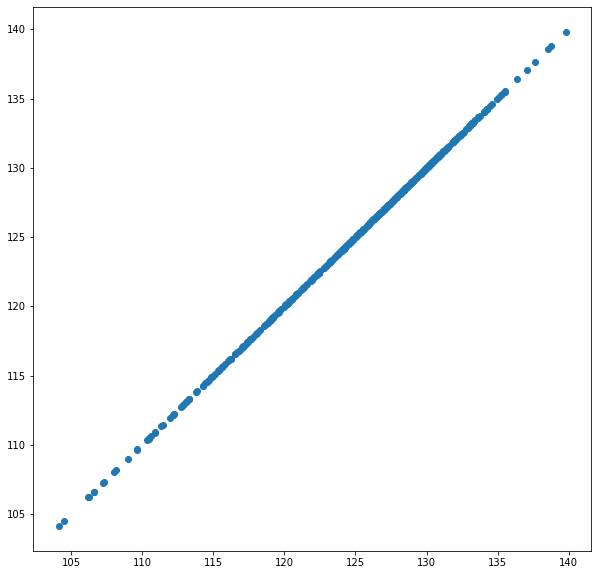

In [168]:
plt.figure(figsize=(10,10))
plt.scatter(RigeModel.predict(x_test), y_test)

In [169]:
RigeModel.predict(x_test)[:5]

array([129.02582111, 128.19835752, 129.8493229 , 113.13102059,
       137.6547974 ])

In [170]:
y_test[:5]

1140    129.027
895     128.200
778     129.848
344     113.129
1347    137.658
Name: Scaled sound pressure level, dtype: float64